In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-classification-dataset-csv/emails.csv


In [2]:
# import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
df = pd.read_csv('/kaggle/input/email-spam-classification-dataset-csv/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [5]:
df['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [6]:
y = pd.get_dummies(df['Prediction'])
y.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [7]:
# provide the columns to avoid
ex_col = ['Email No.','Prediction']
X = df[[col for col in df.columns.to_list() if col not in ex_col]]
X.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [8]:
X = np.asarray(X)
y = np.asarray(y)

In [9]:
del df

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train, X_val, y_train,y_val = train_test_split(X,y,test_size=0.05,random_state=0) # split train adn validation

In [11]:
model = tf.keras.models.Sequential([
    layers.Dense(3000,input_dim=3000,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1000,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              9003000   
                                                                 
 dropout (Dropout)           (None, 3000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 12,006,002
Trainable params: 12,006,002
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
epoch = 10
history = model.fit(X_train, y_train, epochs=epoch, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/10
50/50 [==============================] - 10s 179ms/step - loss: 1.8232 - accuracy: 0.8514 - val_loss: 0.2116 - val_accuracy: 0.9035
Epoch 2/10
50/50 [==============================] - 8s 167ms/step - loss: 0.1731 - accuracy: 0.9615 - val_loss: 0.0832 - val_accuracy: 0.9768
Epoch 3/10
50/50 [==============================] - 8s 165ms/step - loss: 0.1202 - accuracy: 0.9731 - val_loss: 0.2100 - val_accuracy: 0.9459
Epoch 4/10
50/50 [==============================] - 8s 168ms/step - loss: 0.0746 - accuracy: 0.9819 - val_loss: 0.0386 - val_accuracy: 0.9884
Epoch 5/10
50/50 [==============================] - 8s 165ms/step - loss: 0.0354 - accuracy: 0.9904 - val_loss: 0.0447 - val_accuracy: 0.9884
Epoch 6/10
50/50 [==============================] - 8s 166ms/step - loss: 0.0934 - accuracy: 0.9835 - val_loss: 0.1456 - val_accuracy: 0.9382
Epoch 7/10
50/50 [==============================] - 8s 161ms/step - loss: 0.0446 - accuracy: 0.9884 - val_loss: 0.0450 - val_accuracy: 0.9884
Epoch

In [14]:
evaluation = model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 14ms/step - loss: 0.0427 - accuracy: 0.9865


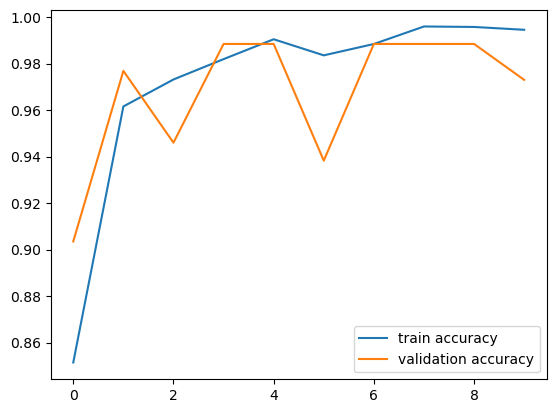

In [15]:
plt.plot(range(epoch),history.history.get('accuracy'))
plt.plot(range(epoch),history.history.get('val_accuracy'))
plt.legend(['train accuracy','validation accuracy'])
plt.show()

In [16]:
unseen_x = X_test[0].reshape(1,-1)
# make predictions
predictions = model.predict(unseen_x)
predicted_classes = np.argmax(predictions, axis=1)

# making predictions on unseen data
predictions = model.predict(unseen_x)
predicted_classes = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 26ms/step


In [17]:
predicted_classes

array([0])

In [18]:
y_test[0]

array([1, 0], dtype=uint8)

In [19]:
y_test

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [20]:
# history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_val,y_val))
# history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_val, y_val))

# csv_file = pd.read_csv('/kaggle/input/email-spam-classification-dataset-csv/emails.csv')

# x_train = csv_file[[col for col in csv_file.columns if col not in ex_col]]

# y_train = pd.get_dummies(csv_file['Prediction'])
# del csv_file['Prediction']

# x_train = np.asarray(x_train)
# y_train = np.asarray(y_train)

# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)  # split train and test
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05)  # split train adn validation

# # building the model
# model = tf.keras.models.Sequential()
# model.add(layers.Dense(3000, input_dim=3000, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(1000, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(2, activation='sigmoid'))
# model.summary()

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_val, y_val))
# evaluation = model.evaluate(x_test, y_test)




#####################################################################################
# x_train = np.asarray(X_train)
# y_train = np.asarray(y_train)
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)  # split train and test
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05)  # split train adn validation

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_val, y_val))
# evaluation = model.evaluate(x_test, y_test)